In [1]:
# Import dependencies
import pandas as pd
import scipy.stats as st
import matplotlib
import csv
import os
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

from api_keys import g_key

In [2]:
data_df = pd.read_csv("listings1.csv")
data_df = data_df.drop("neighbourhood_group", axis = 1)
data_df = data_df.dropna()
#data_df.head()

index_price = data_df[data_df["price"] == 0 ].index
for x in range(len(index_price)):
    data_df.drop(index_price[x], inplace = True)
    
population = [400161, 608479, 199224, 1164477, 390348, 390348, 1827868, 243886, 137927, 749982, 361593, 677104, 415933,
              417416, 532553, 364439, 427263]


len(data_df)
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361


In [95]:
locations = data_df[["latitude", "longitude"]]
price = data_df["price"]
max_int = data_df["price"].max()

In [96]:
# Plot Price heatmap
fig = gmaps.figure()

# Create a heat layer
heat_l = gmaps.heatmap_layer(locations, weights = price, max_intensity = max_int, point_radius = 10)

# Add the heat layer
fig.add_layer(heat_l)

# Display the plot
fig

Figure(layout=FigureLayout(height='420px'))

In [137]:
inm_df = pd.read_csv("inmuebles-catalogados.csv")
cuenta = inm_df["Alcaldia"].value_counts().to_frame(name = "Pat")
cuenta.index = cuenta.index.str.lower()
cuenta.index = cuenta.index.str.title()
cuenta = cuenta.sort_index()
# cuenta.head(16)

In [143]:
delitos_df = pd.read_csv("delitos.csv", usecols = (['alcaldia_hechos', 'delito']))
delitos_df.index = delitos_df["alcaldia_hechos"]
delitos_df = delitos_df.drop(columns = "alcaldia_hechos")
delitos_df = delitos_df.sort_index()
# delitos_df.head()

In [144]:
price = data_df.groupby(["neighbourhood"])["price"].mean().to_frame(name = "price")
price = price.sort_index()
neighbourhood["price"] = price["price"]
# neighbourhood.head(16)

In [145]:
neighbourhood = neighbourhood.rename({"Álvaro Obregón": "Alvaro Obregón"})
neighbourhood = neighbourhood.sort_index()
neighbourhood["insidences"] = ""
for x in range(len(cuenta["Pat"])):
    neighbourhood["insidences"][x] = delitos_df["delito"][x]
# neighbourhood.head(16)

C:\Users\Ernesto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


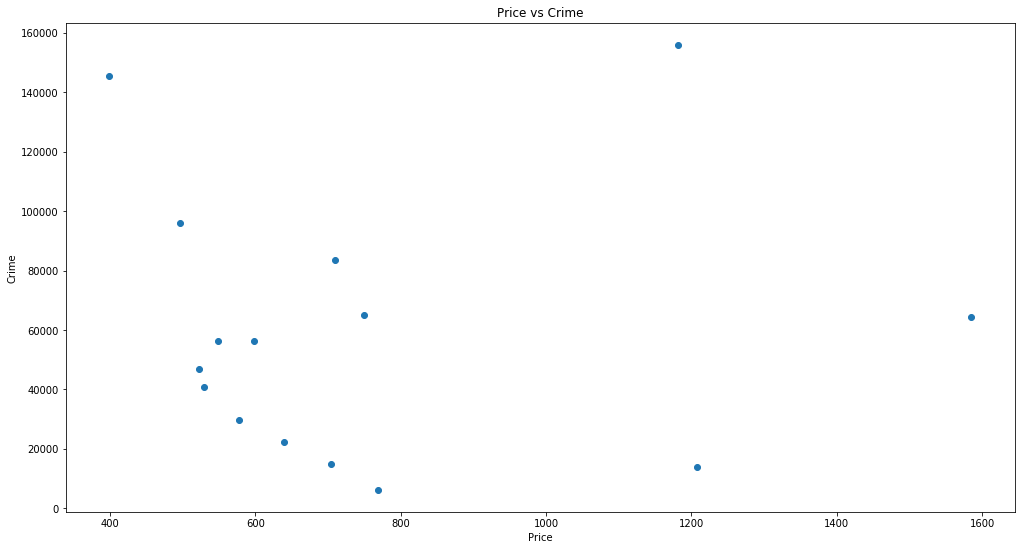

In [151]:
analysis_df = neighbourhood[["neighbourhood", "price", "insidences"]]
analysis_df.head()

fig1,ax1 = plt.subplots(figsize = (17, 9))
plt.scatter(analysis_df["price"], analysis_df["insidences"])
plt.title("Price vs Crime")
plt.xlabel("Price")
plt.ylabel("Crime")
plt.show()

# Analysis

## Price vs Crime

* For this dataset, we can clearly see that, as the price increases, the crime rate reduces.


* We can also see that we have two outliers in this dataset; Miguel Hidalgo and Cuauhtémoc. This two seem to not be influenced, in price, by the amount of crime. 
* Cuauhtémoc has the largest crime rate of Mexico City and is the 3rd neighbourhood with the highest mean price for Airbnb. Miguel Hidalgo has the highest mean price for Airbnb and is the 5th most expensive neighbourhood.
* After a thorough analyisis, we found out that this is due to the fact that they have some of the most touristic places in Mexico City, which are Polanco and Chapultepec for Miguel Hidalgo, and Colonia Roma, Condesa and El Zócalo for Cuauhtémoc.

<function matplotlib.pyplot.show(*args, **kw)>

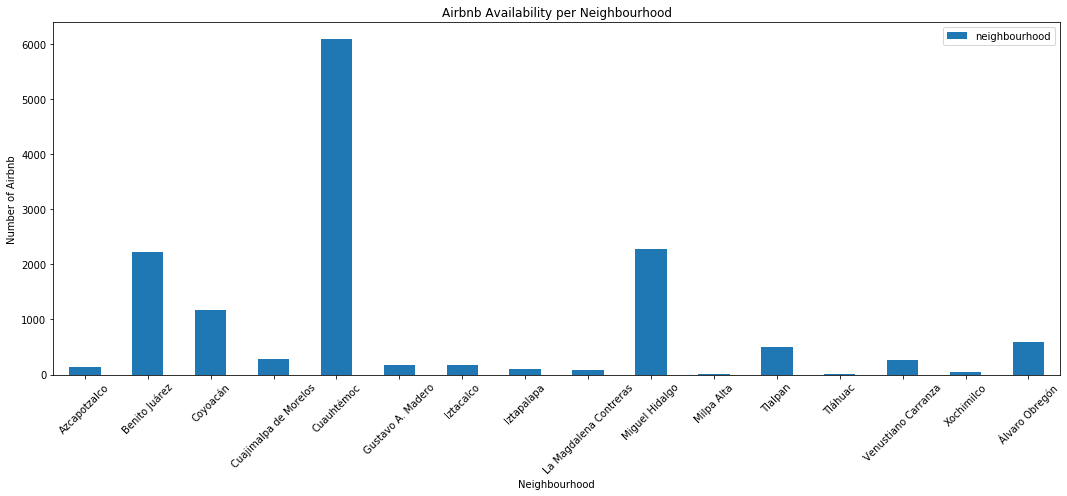

In [97]:
neighbourhood = data_df["neighbourhood"].value_counts().to_frame()
neighbourhood.sort_index().plot(kind = "bar", figsize = (15, 7))
plt.title("Airbnb Availability per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Airbnb")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

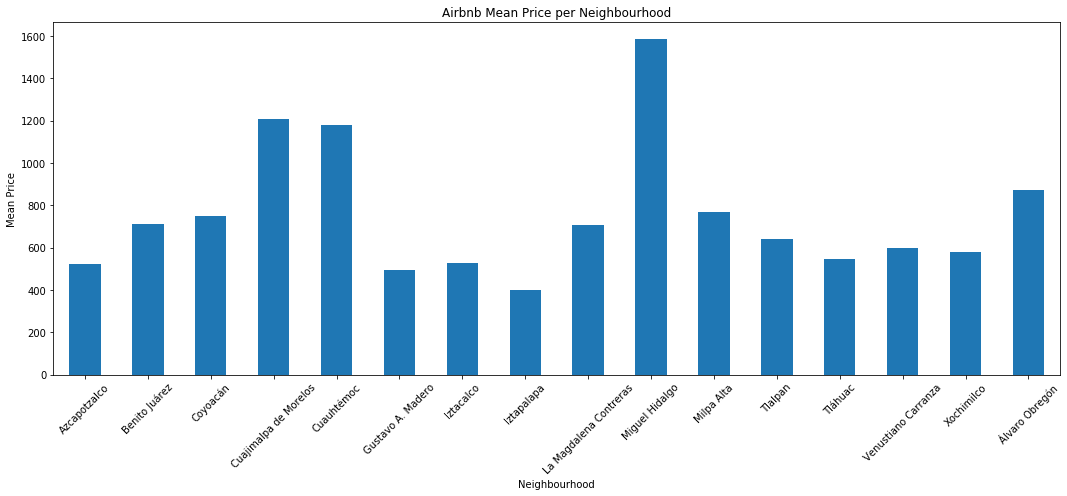

In [98]:
data_df.groupby(["neighbourhood"])["price"].mean().plot(kind = "bar", figsize = (15, 7))
plt.title("Airbnb Mean Price per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

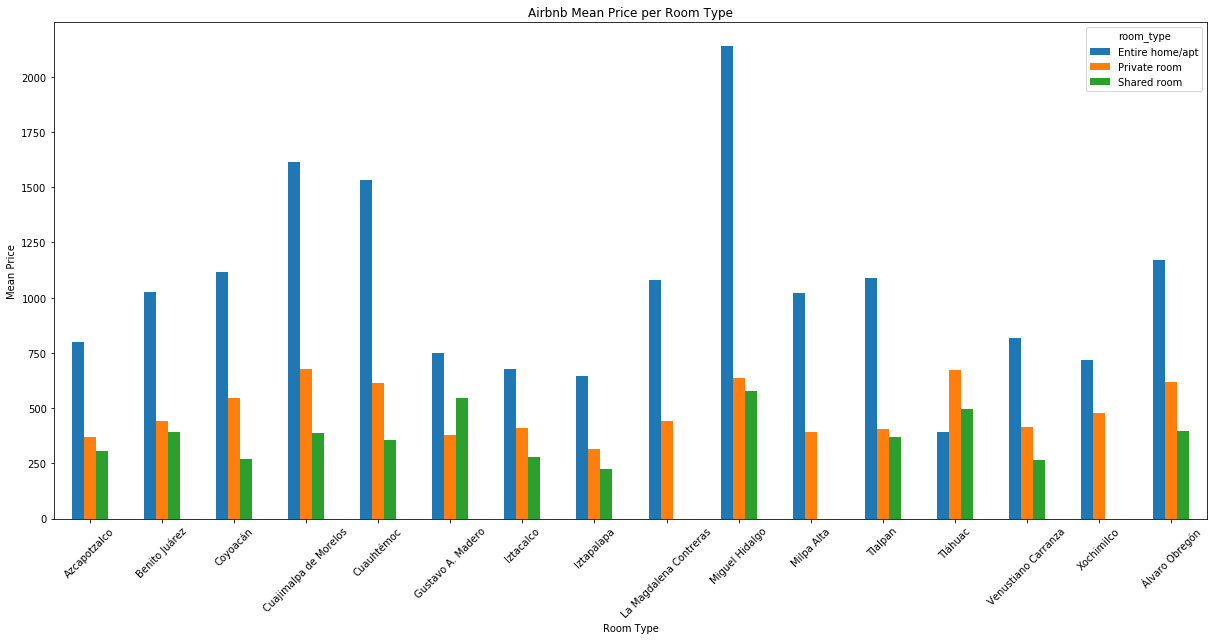

In [13]:
room_price = data_df.groupby(["neighbourhood", "room_type"])["price"].mean().unstack()
room_price.plot(kind = "bar", figsize = (17,9))
plt.title("Airbnb Mean Price per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Mean Price")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()